In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings(action = 'ignore')
#plt. style.use([' seaborn-bright', 'dark_background'])

# to visualize the dicision tree
from sklearn.tree import export_graphviz
from graphviz import render

In [310]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Diginique Internship/Project/explored_weather_data.csv")

In [311]:
df = pd.read_csv("explored_weather_data.csv")

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139354 entries, 0 to 139353
Data columns (total 93 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 139354 non-null  int64  
 1   MinTemp                    139354 non-null  float64
 2   MaxTemp                    139354 non-null  float64
 3   Rainfall                   139354 non-null  float64
 4   WindGustSpeed              139354 non-null  float64
 5   WindSpeed9am               139354 non-null  float64
 6   WindSpeed3pm               139354 non-null  float64
 7   Humidity9am                139354 non-null  float64
 8   Humidity3pm                139354 non-null  float64
 9   Pressure9am                139354 non-null  float64
 10  Pressure3pm                139354 non-null  float64
 11  Temp9am                    139354 non-null  float64
 12  Temp3pm                    139354 non-null  float64
 13  RainToday                  13

In [313]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

## Splitting the data

In [314]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_P

In [315]:
X = df.drop(columns = ["Rainfall",'RainToday', 'RainTomorrow'])
Y = df['RainToday']

# Using the dicision tree algorithm from sklearn

In [316]:
from sklearn. model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train. shape, y_test.shape

((111483, 89), (27871, 89), (111483,), (27871,))

In [317]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( criterion = "entropy", class_weight = 'balanced')
# classifier = DTC()

In [318]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

# performance of the model

In [319]:
from sklearn.metrics import classification_report
print (classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86605
         1.0       1.00      1.00      1.00     24878

    accuracy                           1.00    111483
   macro avg       1.00      1.00      1.00    111483
weighted avg       1.00      1.00      1.00    111483



In [320]:
predicted_values = classifier.predict(x_test)
print (classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     21651
         1.0       0.51      0.53      0.52      6220

    accuracy                           0.78     27871
   macro avg       0.69      0.69      0.69     27871
weighted avg       0.79      0.78      0.78     27871



# Pruning

In [321]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## Helper functions

In [322]:
from sklearn. metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)

    predict = model.predict(x1)
    f1 = f1_score(y1, predict)

    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    return f1, f2

In [323]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'tran_Score')
    plt.plot(x_axis, test_score, color = 'blue', label = "test_Score")
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1 score")
    plt.show()

### Max Depth

In [324]:
maxdepth = [i for i in range (1,30)]
train = []
test = []
for i in maxdepth:
    model = DTC (class_weight = 'balanced', max_depth = i, random_state = 98)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

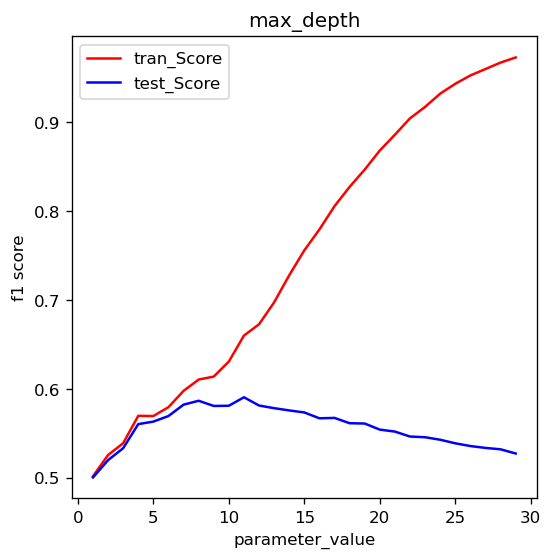

In [325]:
effect(train, test, range(1,30), "max_depth")

In [1]:
MaxDepth = 7

### Min Sample Split

In [351]:
min_samples = [i for i in range (2,1000,10)]
train = []
test = []
for i in min_samples:
    model = DTC (class_weight = 'balanced', min_samples_split = i, random_state = 98, max_depth = MaxDepth)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

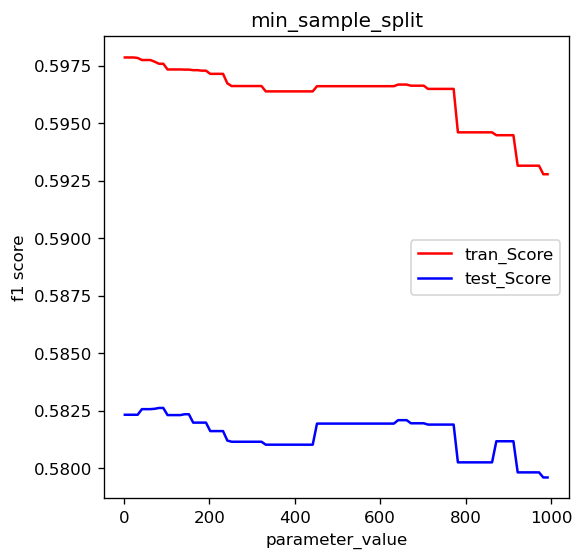

In [352]:
effect(train, test, range(2,1000,10), "min_sample_split")

In [2]:
MinSamplesSplit = 40

### Max leaf Node

In [344]:
maxleafnodes = [i for i in range(2,50,5)]
train = []
test = []
for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 98, max_depth = MaxDepth)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

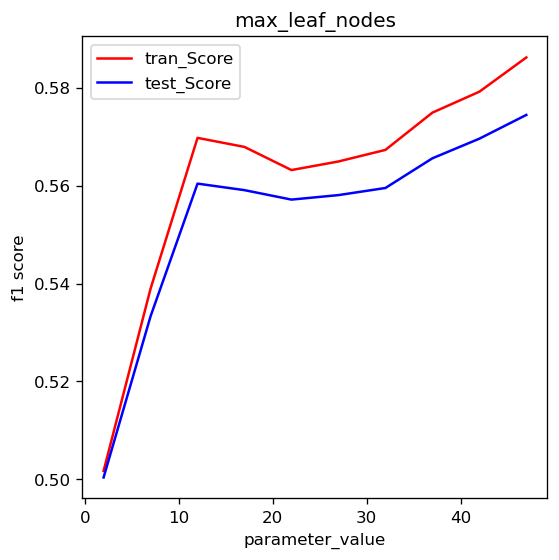

In [345]:
effect(train, test, range(2,50,5), "max_leaf_nodes")

In [3]:
MaxLeafNodes = 12

### Min Sample leaf

In [333]:
minsamplesleaf = [i for i in range(2,700,10)]
train = []
test = []
for i in minsamplesleaf:
    model = DTC (class_weight = 'balanced', min_samples_leaf = i, random_state = 98, max_depth = MaxDepth)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

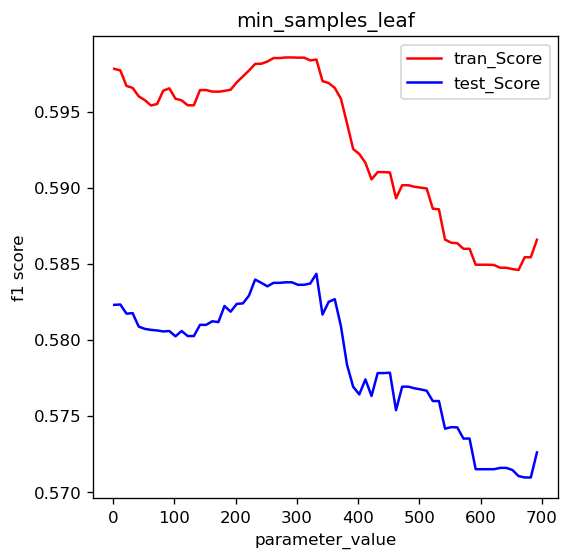

In [334]:
effect(train, test, range(2,700,10), "min_samples_leaf")

In [4]:
MinSamplesLeaf = 325

# Updated model

In [355]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( criterion = "entropy", class_weight = 'balanced', max_depth = MaxDepth, min_samples_split = MinSamplesSplit, max_leaf_nodes = MaxLeafNodes, min_samples_leaf = MinSamplesLeaf)


In [356]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

#### Performance of updated model

In [357]:
from sklearn.metrics import classification_report
print (classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81     86605
         1.0       0.45      0.74      0.56     24878

    accuracy                           0.74    111483
   macro avg       0.68      0.74      0.69    111483
weighted avg       0.80      0.74      0.76    111483



In [358]:
predicted_values = classifier.predict(x_test)
print (classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81     21651
         1.0       0.44      0.72      0.55      6220

    accuracy                           0.73     27871
   macro avg       0.67      0.73      0.68     27871
weighted avg       0.80      0.73      0.75     27871



In [359]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_values)


0.7347063255713825

# visualizing the updated model

In [360]:
export_graphviz (decision_tree = classifier, out_file = 'tree_viz', max_depth=MaxDepth, feature_names = X.columns, label = "none", impurity = False)
render( filepath='tree_viz', format = 'png', engine = 'neato')


'tree_viz.png'